Data = https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Import Libraries

In [180]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [181]:
data_bank = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep = ';')

In [182]:
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [183]:
data_bank.shape

(41188, 21)

In [184]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Cleaning

In [185]:
data_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [186]:
data_bank.duplicated().sum()

12

In [187]:
data_bank = data_bank.drop_duplicates(keep='first')

In [188]:
data_bank.duplicated().sum()

0

In [189]:
data_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Visualization Data

> Pie Chart of Subcriber

In [190]:
subscriber = data_bank['y'].value_counts()
subscriber

no     36537
yes     4639
Name: y, dtype: int64

Text(0.5, 1.15, 'Percentage of a Term Deposit Subscriber')

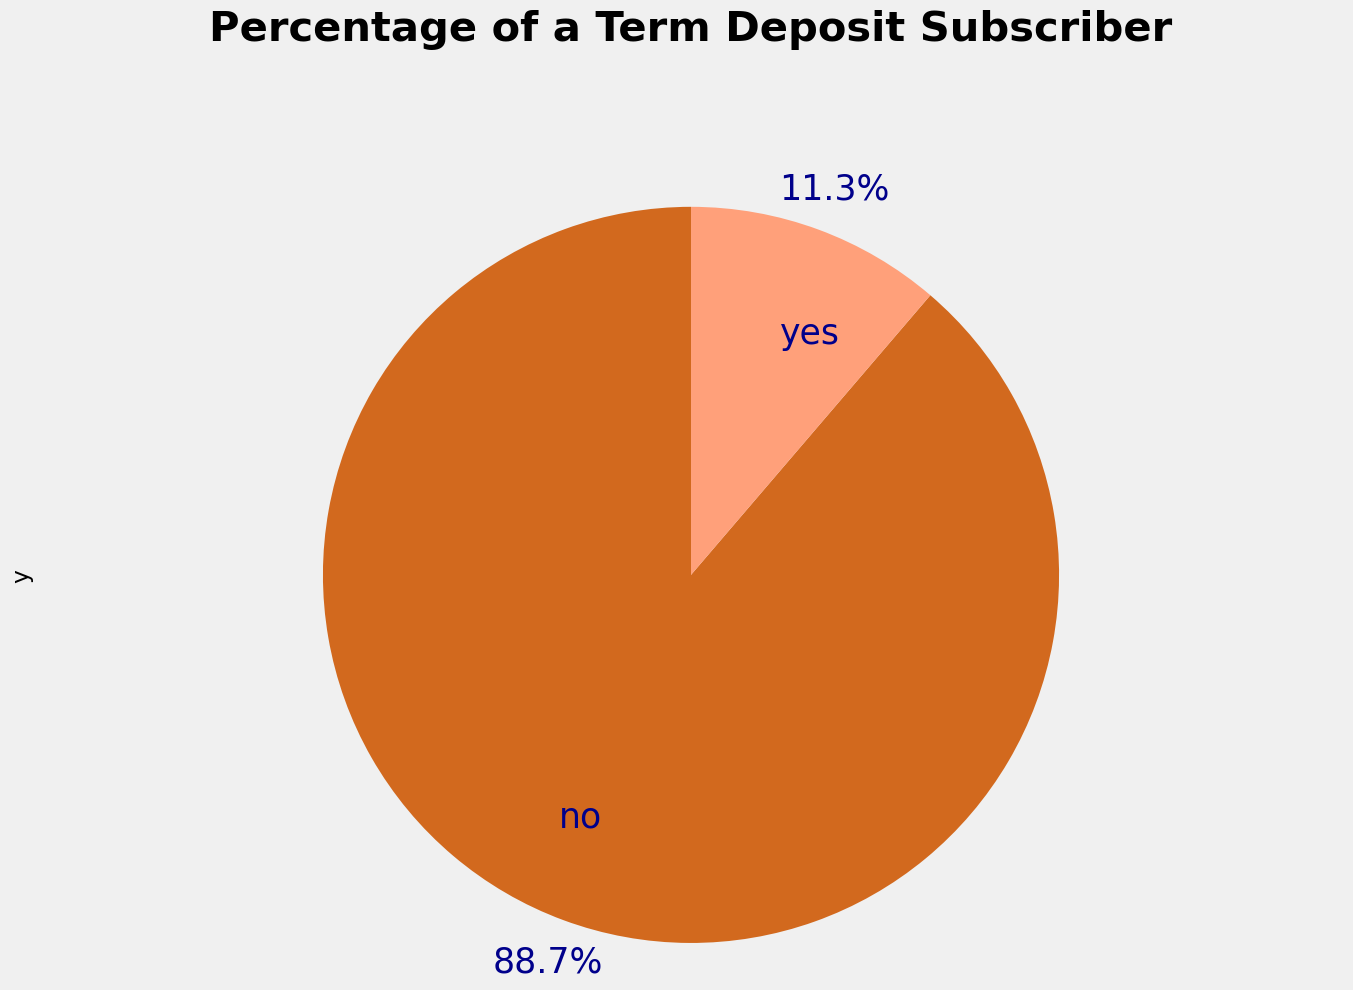

In [191]:
lable=['no', 'yes']

ax = plt.axes()
ax.set_facecolor("lightblue")

subscriber.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=1.12,
    labels = lable,
    labeldistance = 0.7,
    colors = ['chocolate', 'lightsalmon'],
    textprops={'fontsize': 25,'color':'darkblue'})
    
plt.axis('equal')
plt.title("Percentage of a Term Deposit Subscriber", y=1.15, weight='bold',size='30')


dilihat dari diagram lingkaran diatas, dapat diketahui terdapat 11.3 % atau sebanyak 4639 nasabah yang memutuskan untuk berlangganan bank term deposit pada lembaga perbankan Portugis. Sedangkan untuk nasabah lainnya yaitu sebesar 88.7 % atau sebanyak 36537 memutuskan untuk tidak berlangganan bank term deposit.

> FacetGrid of Age

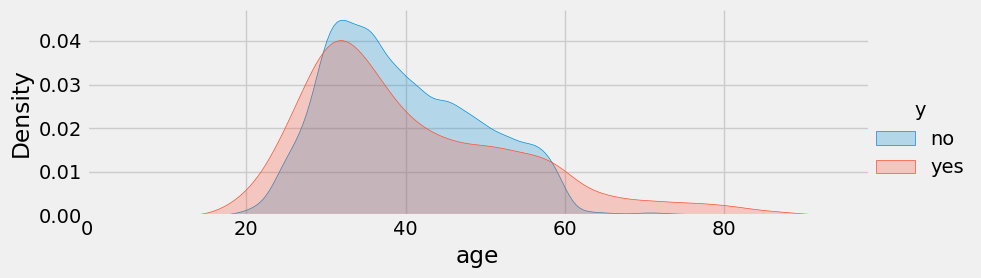

In [192]:
data_age = sns.FacetGrid(data_bank, hue="y", aspect=3)
data_age.map(sns.kdeplot, 'age', shade=True)
data_age.set(xlim=(0, data_bank["age"].max()))
data_age.add_legend()
plt.show()

Nasabah yang menjadi sasaran marketing campaign paling banyak berada antara usia 30-40 tahun. Jumlah nasabah yang berlangganan meningkat pada usia

> Bar Plot of Job

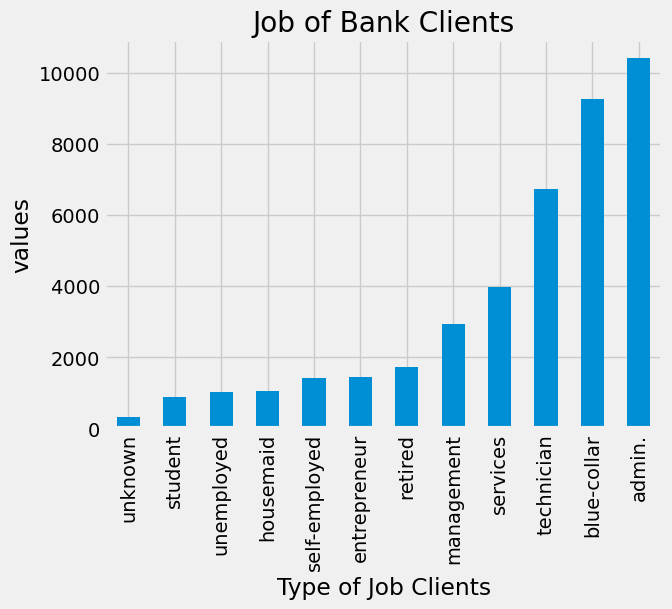

In [193]:
data_job = data_bank['job'].value_counts().sort_values(ascending=True)

data_job.plot(kind='bar')
plt.title('Job of Bank Clients')
plt.ylabel('values')
plt.xlabel('Type of Job Clients')

plt.show()

Diketahui bahwa terdapat 12 jenis pekerjaan para nasabah bank Portugis. Adapun, jenis pekerjaan nasabah yang paling banyak adalah admin.

# Data Preprocessing

In [194]:
label_encoder = preprocessing.LabelEncoder()

data_category = data_bank.select_dtypes(include='object')
data_copy = data_bank.copy()

for column in data_category.columns:
    data_copy[column] = label_encoder.fit_transform(data_bank[column])

In [195]:
data_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [196]:
def plot_corr(data_bank, size=30):
    corr = data_bank.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

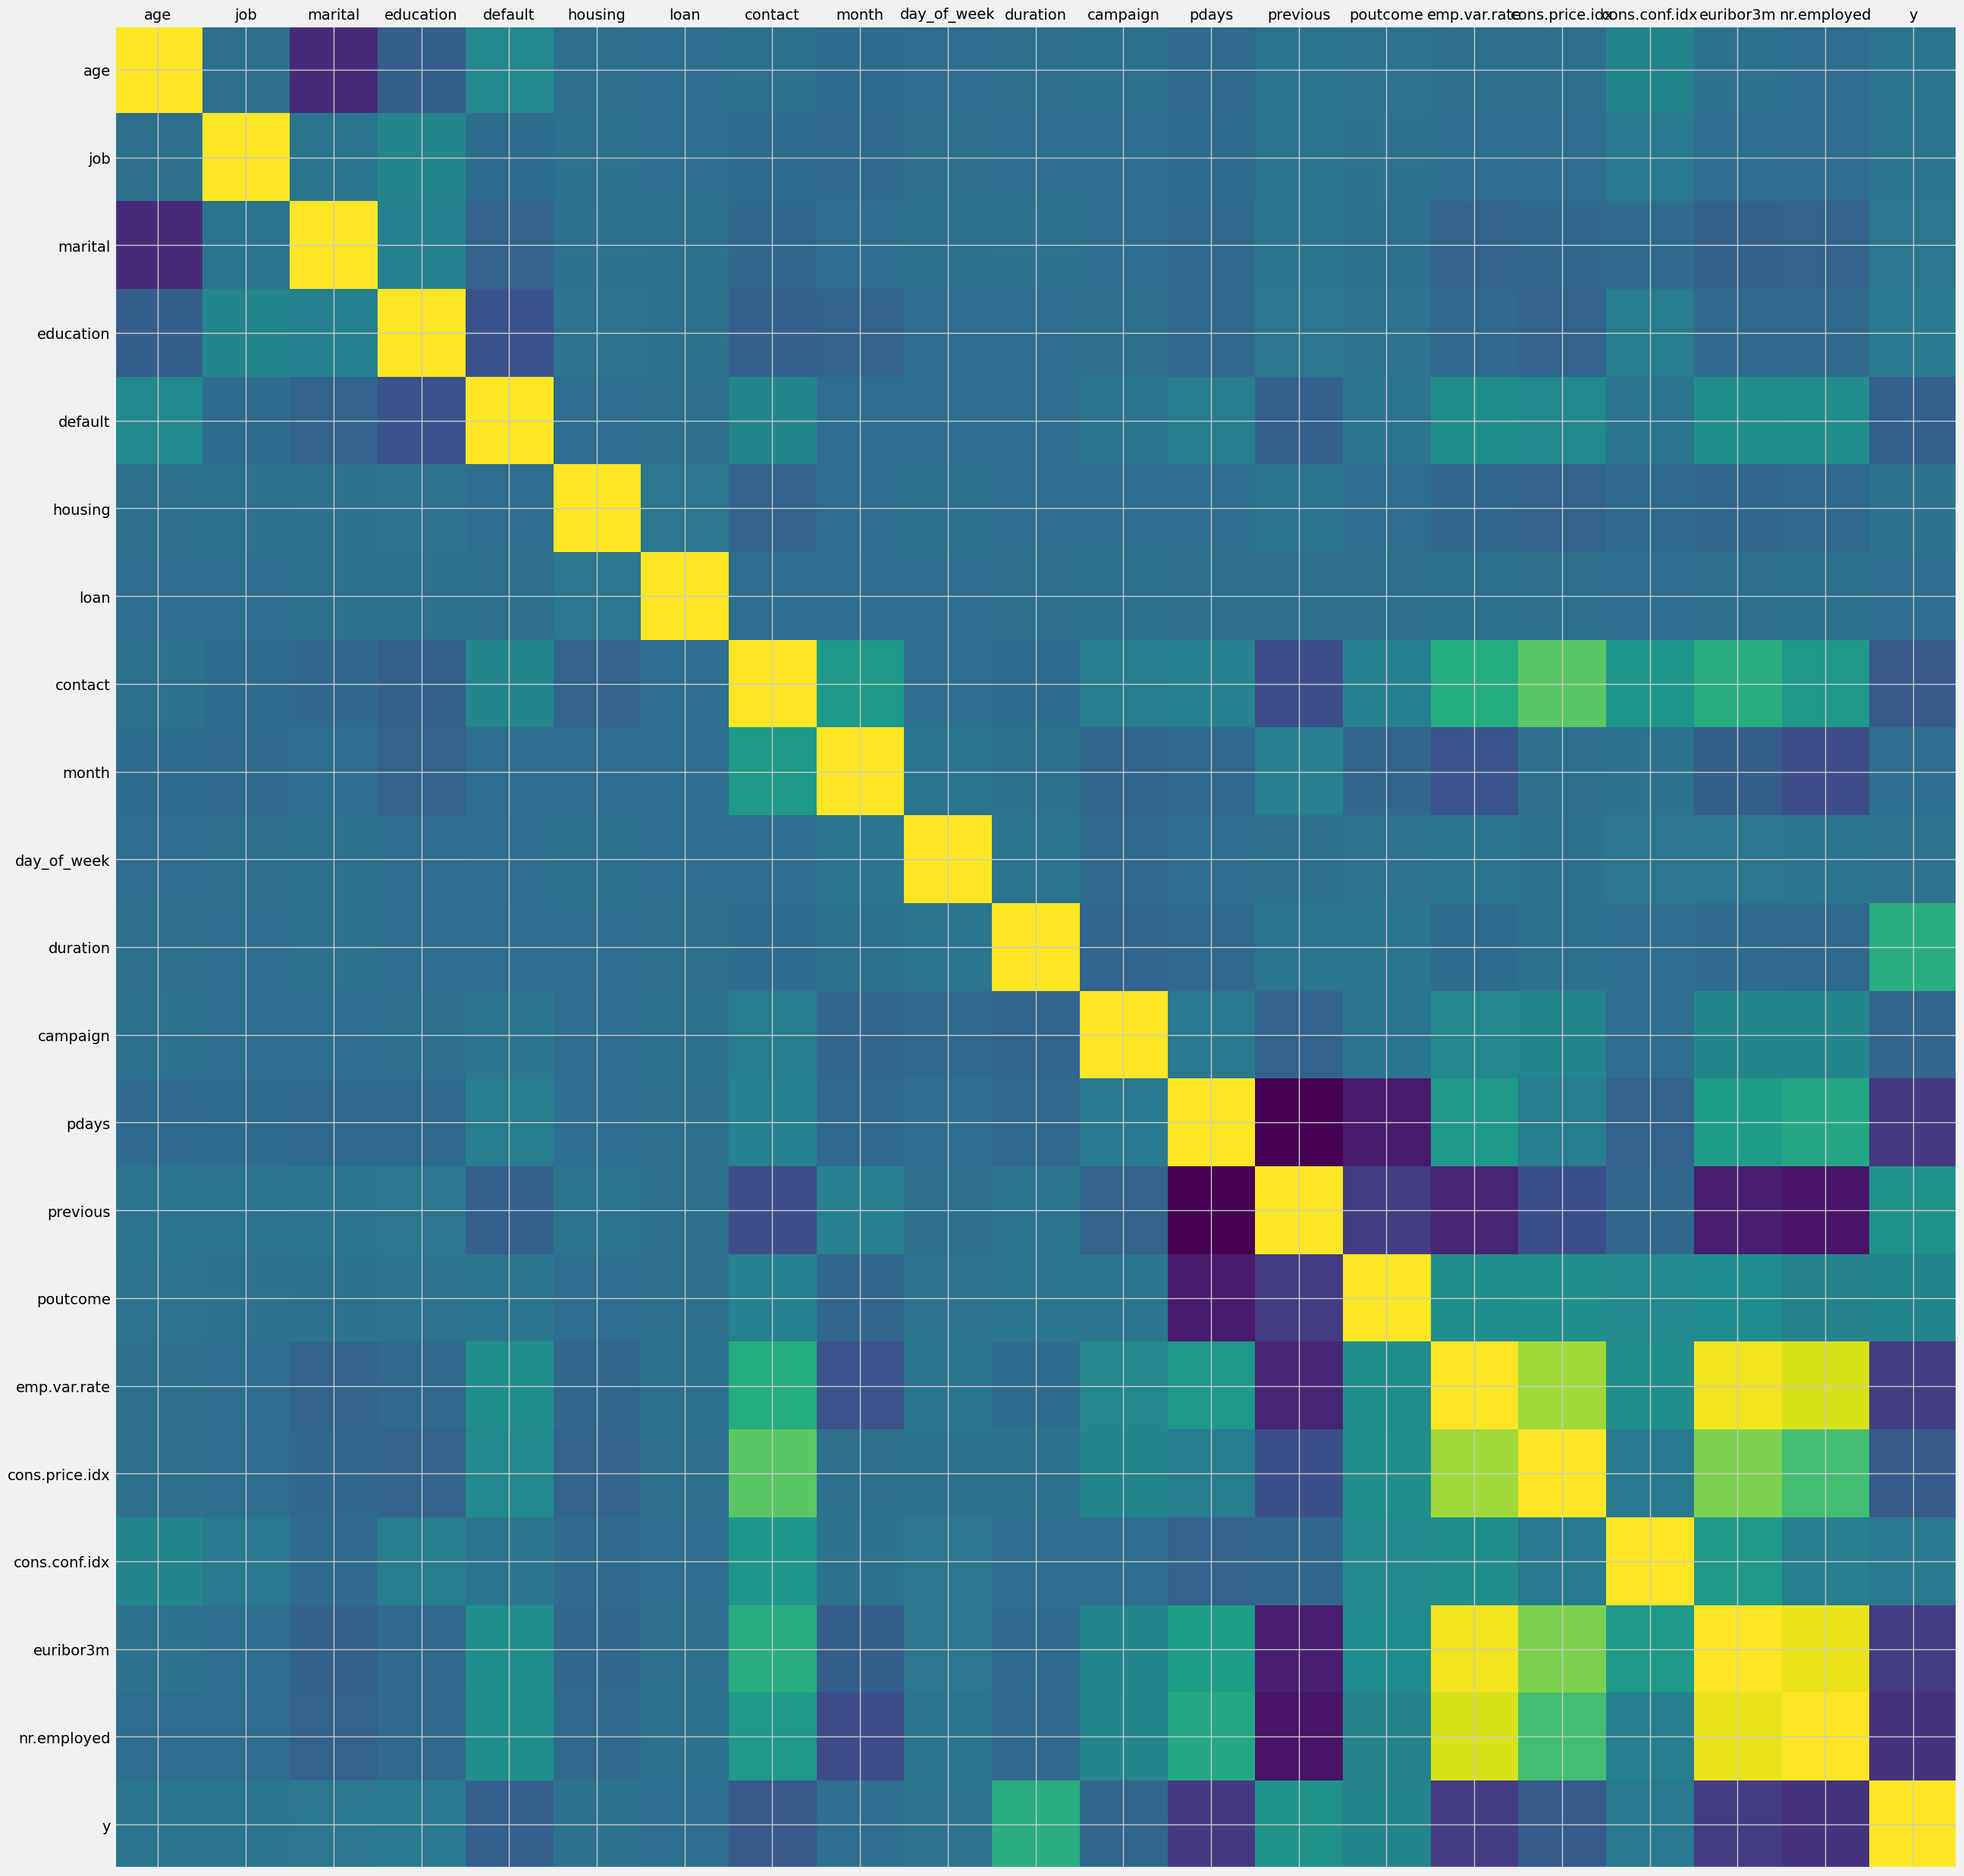

In [197]:
plot_corr(data_copy)

Berdasarkan visulisasi diatas, terdapat kotak-kotak berwarna kuning diluar diagonal yang mana artinya ada data yang sama

In [198]:
data_copy.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001270,-0.389829,-0.117960,0.164939,-0.001477,-0.007359,0.006917,-0.025023,-0.017614,...,0.004622,-0.034381,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.001270,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,...,-0.006865,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.389829,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,...,-0.007189,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.117960,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,...,0.000406,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
default,0.164939,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,...,0.032809,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
housing,-0.001477,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,...,-0.011074,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007359,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,...,0.005119,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.006917,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,...,0.077387,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,-0.025023,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,...,-0.062128,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
day_of_week,-0.017614,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,...,-0.038254,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


In [199]:
# Splitting Data
X = data_copy.drop(columns=['y'])
y = data_copy['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelling

> Logistic Regression

In [200]:
# Create Logistic regression Model
model_lr= LogisticRegression(solver='liblinear', random_state=0)

# Train the Model
model_lr.fit(X_train, y_train)

# Predict the Response
y_predLR = model_lr.predict(X_test)

print(classification_report(y_test, y_predLR))
print("Accuracy:", metrics.accuracy_score(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7269
           1       0.69      0.37      0.48       967

    accuracy                           0.91      8236
   macro avg       0.80      0.68      0.72      8236
weighted avg       0.89      0.91      0.89      8236

Accuracy: 0.9062651772705197


In [201]:
# Confusion Matrix
cm_lr=confusion_matrix(y_test,y_predLR)
cm_lr

array([[7103,  166],
       [ 606,  361]], dtype=int64)

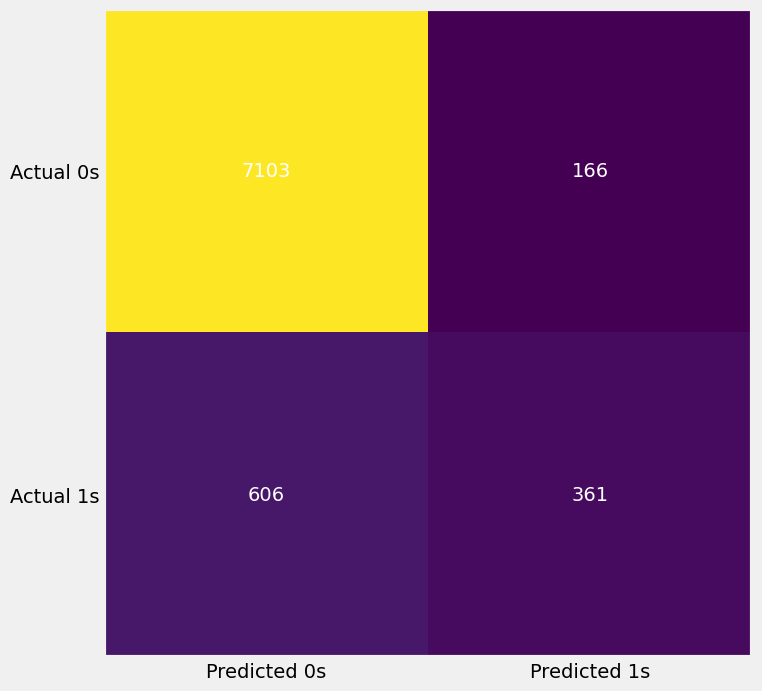

In [202]:
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_lr)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

# K-Nearest Neighbors

In [203]:
# Create KNN Classifier
model_KNN=KNeighborsClassifier(n_neighbors=5)

# Train the Model
model_KNN.fit(X_train, y_train)

# Predict the Response
y_predKNN = model_KNN.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_predKNN))

Accuracy: 0.9054152501214182


In [204]:
error = []

# menghitung error dari nilai K antara 1 sampai 40
for i in range(1, 40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error mean')

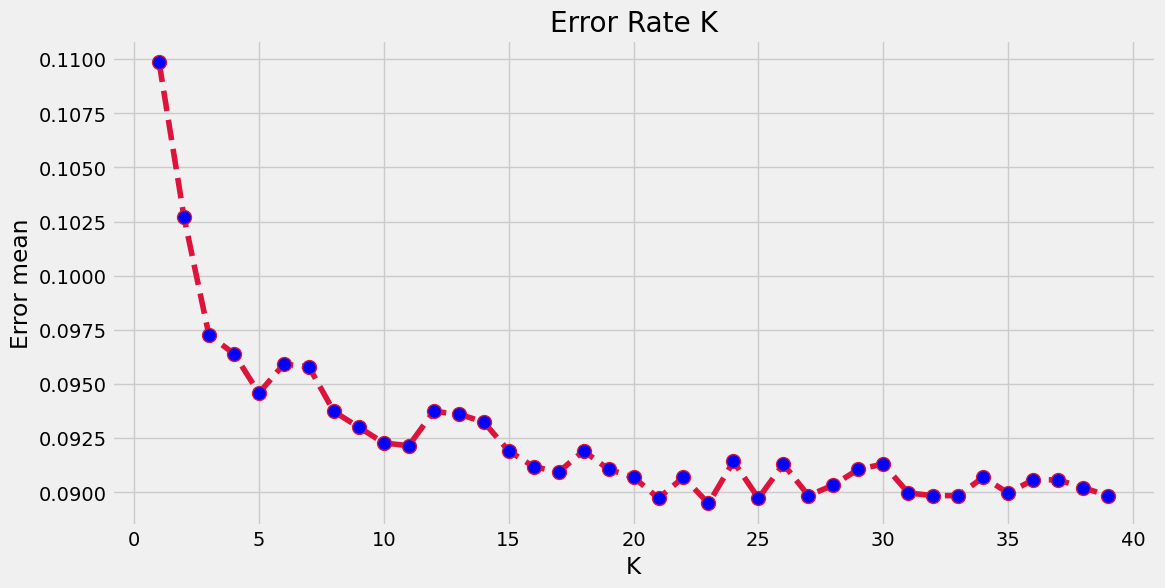

In [205]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='crimson', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

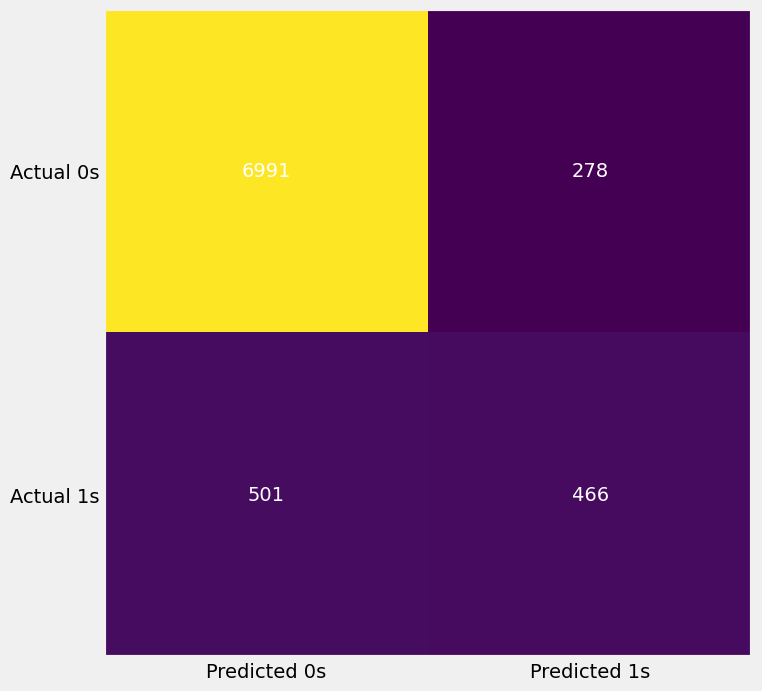

In [206]:
# Confusion Matrix
cm_knn=confusion_matrix(y_test,y_predKNN)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

# Support Vector Machine

In [207]:
# Create SVM Classifier
svm_model = svm.SVC(kernel='linear')

# Train the Model
svm_model.fit(X_train, y_train)

# Predict the Response
y_predSVM = svm_model.predict(X_test)

print(classification_report(y_test, y_predSVM))
print("Accuracy:", accuracy_score(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7269
           1       0.56      0.46      0.51       967

    accuracy                           0.89      8236
   macro avg       0.74      0.71      0.72      8236
weighted avg       0.89      0.89      0.89      8236

Accuracy: 0.8940019426906265


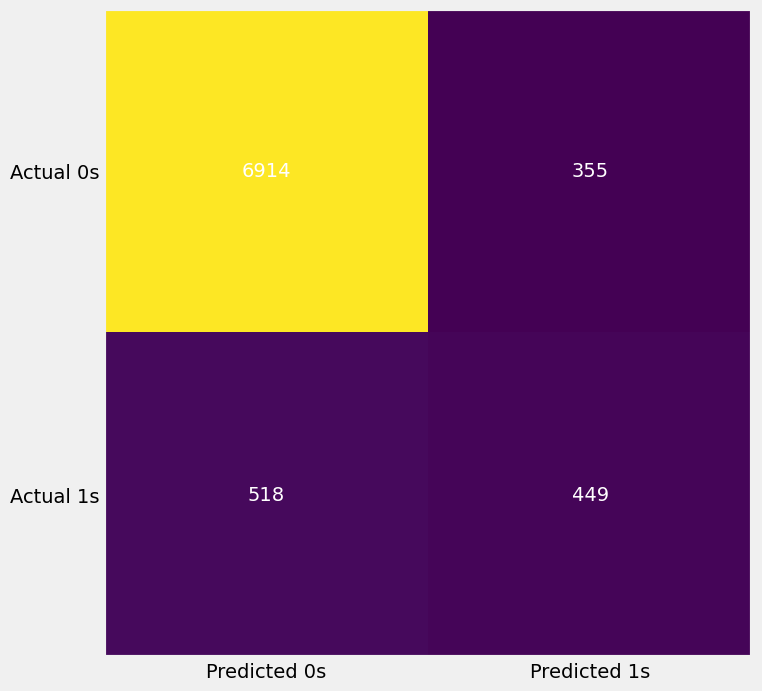

In [208]:
# Confusion Matrix
cm_svm=confusion_matrix(y_test,y_predSVM)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

# Decision Tree

In [209]:
# Create Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train the Model
dt_model.fit(X_train, y_train)

# Predict the Response
y_predDT = dt_model.predict(X_test)

print(classification_report(y_test, y_predDT))
print("Accuracy:", accuracy_score(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7269
           1       0.64      0.42      0.51       967

    accuracy                           0.90      8236
   macro avg       0.78      0.69      0.73      8236
weighted avg       0.89      0.90      0.90      8236

Accuracy: 0.9040796503156873


# Random Forest

In [ ]:
# Create Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Train the Model
rf_model.fit(X_train, y_train)

# Predict the Response
y_predRF = rf_model.predict(X_test)

print(classification_report(y_test, y_predRF))
print("Accuracy:", accuracy_score(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7269
           1       0.67      0.49      0.57       967

    accuracy                           0.91      8236
   macro avg       0.80      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236

Accuracy: 0.9117289946576008


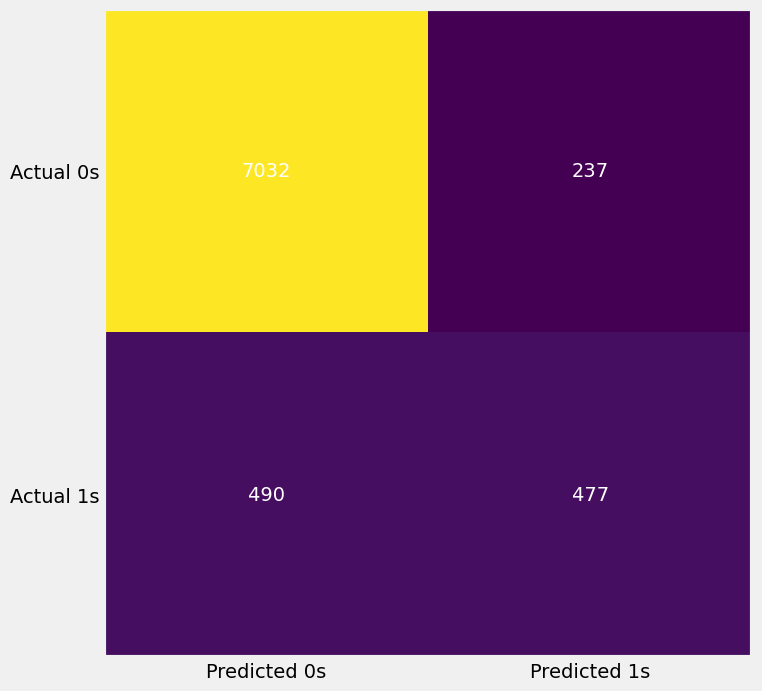

In [ ]:
# Confusion Matrix
cm_rf=confusion_matrix(y_test,y_predRF)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_rf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rf[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
# Create Gaussian Classifier
nb_model = GaussianNB()

# Train the Model
nb_model.fit(X_train, y_train)

# Predict the Response
y_predNB = nb_model.predict(X_test)

print(classification_report(y_test, y_predNB))
print("Accuracy:", accuracy_score(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7269
           1       0.41      0.61      0.49       967

    accuracy                           0.85      8236
   macro avg       0.68      0.75      0.70      8236
weighted avg       0.88      0.85      0.86      8236

Accuracy: 0.8516270033997086


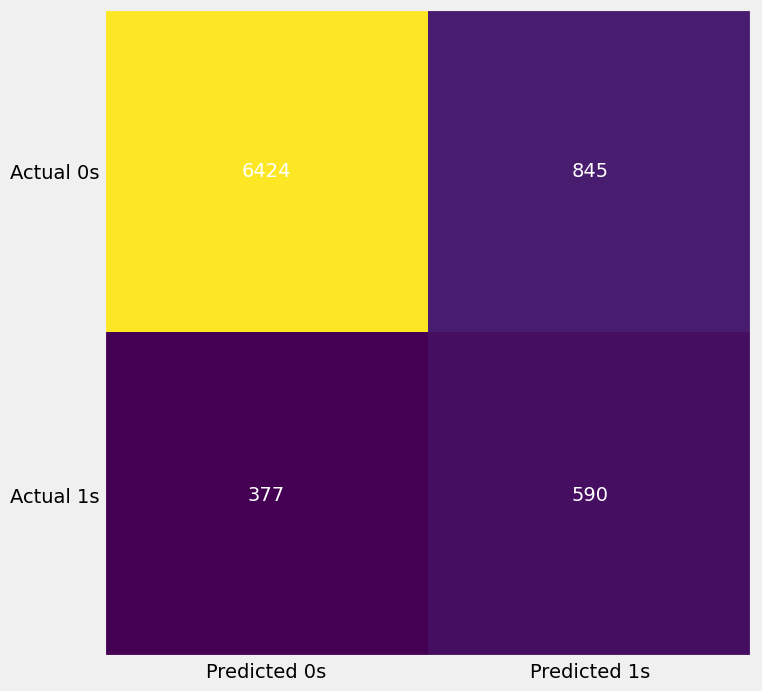

In [ ]:
# Confusion Matrix
cm_nb=confusion_matrix(y_test,y_predNB)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_nb)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_nb[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

# Kesimpulan

1.  Dilihat dari diagram lingkaran diatas, dapat diketahui terdapat 11.3 % atau sebanyak 4639 nasabah yang memutuskan untuk berlangganan bank term deposit pada lembaga perbankan Portugis. Sedangkan untuk nasabah lainnya yaitu sebesar 88.7 % atau sebanyak 36537 memutuskan untuk tidak berlangganan bank term deposit.
2. Nasabah yang menjadi sasaran marketing campaign paling banyak berada antara usia 30-40 tahun. Jumlah nasaah yang berlangganan meningkat pada usia
3. Diketahui bahwa terdapat 12 jenis pekerjaan para nasabah bank Portugis. Adapun, jenis pekerjaan nasabah yang paling banyak adalah admin.